# Aim

To implement Gaussian Low Pass & High Pass Filtering techniques on an image

# Implementation

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2, ifftshift

In [ ]:
path ='/content/drive/MyDrive/DJ/Sem 6/IPCV/gfg.png'

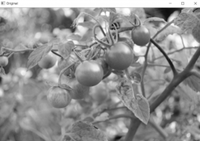

In [ ]:
img = cv.imread(path, 0)
cv2_imshow(img)

# Gaussian Low Pass Filter

In [ ]:
def GaussianLP(img, cutoffFreq=120):
  rows, cols = img.shape
  centreRow, centreCol = rows//2, cols//2
  
  x = np.linspace(-centreCol, centreCol-1, cols)
  y = np.linspace(-centreRow, centreRow-1, rows)
  X,Y = np.meshgrid(x,y)
  distance = np.sqrt(X**2 + Y**2)
  mask = np.e** ( -(distance**2)/(2* (cutoffFreq)**2 ) )  
    
  frequency_domain_img = fftshift(fft2(img))
  filtered_img = frequency_domain_img * mask
  result = np.real(ifft2(ifftshift(filtered_img)))
  
  return result

In [ ]:
LPans = GaussianLP(img)

Gaussian Low Passed Image with D0 = 120


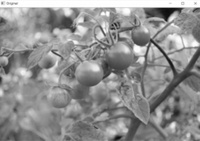

In [ ]:
print('Gaussian Low Passed Image with D0 = 120')
cv2_imshow(LPans)

# Gaussian High Pass Filter

In [ ]:
def GaussianHP(img, cutoffFreq=2):
  rows, cols = img.shape
  centreRow, centreCol = rows//2, cols//2
  
  x = np.linspace(-centreCol, centreCol-1, cols)
  y = np.linspace(-centreRow, centreRow-1, rows)
  X,Y = np.meshgrid(x,y)
  distance = np.sqrt(X**2 + Y**2)
  mask = 1-np.e** ( -(distance**2)/(2* (cutoffFreq)**2 ) )  
    
  frequency_domain_img = fftshift(fft2(img))
  filtered_img = frequency_domain_img * mask
  result = np.real(ifft2(ifftshift(filtered_img)))
  
  return result

In [ ]:
HPans = GaussianHP(img)

Gaussian High Passed Image with D0 = 5


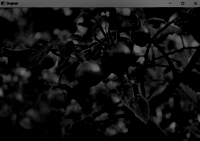

In [ ]:
print('Gaussian High Passed Image with D0 = 2')
cv2_imshow(HPans)

# Conclusion

Gaussian Filters dimish smoothly, instead of abruptly, like High Pass and have less ringing effects